# Plano fase

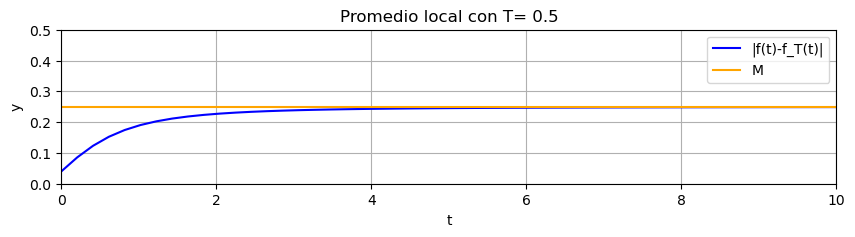

In [1]:
import numpy as np
import matplotlib.pyplot as plt

T = .5
L = 10

t = np.linspace(0,L,50)
h = np.sqrt(t**2+1)
q = 1/T*(2/3*(t+T+5)**(3/2)-2/3*(t+5)**(3/2))
q = 1/T*(1/2*((T + t)*np.sqrt(1 + (T + t)**2) + np.arcsinh(T + t)) - 1 / 2*(t*np.sqrt(1 + t**2) + np.arcsinh(t)))
d = np.abs(h-q)
M = T/2
M = M*np.ones(50)
fig, ax = plt.subplots(figsize = (10,2))
ax.set_title(f'Promedio local con T= {T}')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_xlim(0, L)
ax.set_ylim(0, 0.5)
#ax.scatter(X, Y, color='0.5', s=1)
#plt.plot(t, h, label=f'Función f(t)', color='blue')
#plt.plot(t, q, label=f'Promedio local f_T(t)', color='red')

plt.plot(t, d, label=f'|f(t)-f_T(t)|', color='blue')
plt.plot(t, M, label=f'M', color='orange')

plt.legend()
plt.grid(True)
plt.show()

In [2]:
h

array([ 1.        ,  1.02061222,  1.08009132,  1.17253734,  1.29088691,
        1.42871719,  1.58094126,  1.74379366,  1.91456418,  2.09131402,
        2.27264852,  2.45755302,  2.64527901,  2.8352661 ,  3.02708859,
        3.22041851,  3.41499986,  3.61063033,  3.80714819,  4.00442279,
        4.20234757,  4.4008348 ,  4.59981167,  4.79921728,  4.99900032,
        5.19911728,  5.39953104,  5.60020973,  5.80112586,  6.00225558,
        6.20357812,  6.4050753 ,  6.60673114,  6.80853153,  7.01046401,
        7.21251746,  7.41468201,  7.61694881,  7.81930992,  8.02175821,
        8.22428723,  8.42689117,  8.62956475,  8.83230317,  9.03510208,
        9.23795748,  9.44086574,  9.64382351,  9.84682775, 10.04987562])

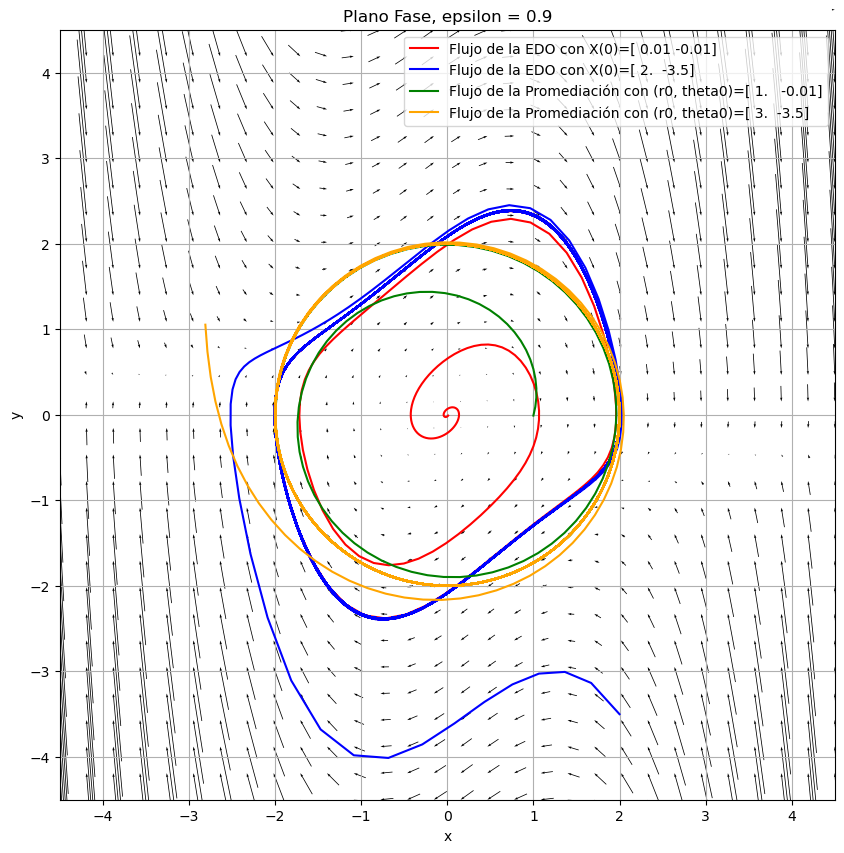

In [3]:
import numpy as np
import matplotlib.pyplot as plt

mu=.7   # Parámetro
# Define el sistema de ecuaciones diferenciales
def f(z):
    x=z[0]
    y=z[1]
    dx = y#-y + x*(1-x**2-y**2)#1
    dy = -x-mu*y*(x**2-1)#x + y*(1-x**2-y**2)#y*(1-y**2)+mu*y*np.cos(x)
    return np.array([dx,dy])

def polar(z):
    r=z[0]
    theta=z[1]
    dr = mu/8*r*(4-r**2)
    dtheta = 1
    return np.array([dr,dtheta])
# Crea una cuadrícula de valores x e y
L=4.5
x = np.linspace(-L, L, 30)
y = np.linspace(-L, L, 30)
X, Y = np.meshgrid(x, y)

# Calcula las derivadas en cada punto de la cuadrícula
d = f(np.array([X, Y]))
dX=d[0,:,:]
dY=d[1,:,:]

# Calcula la trayectoria a partir de un punto inicial con Runge-Kutta
def rk4(y0,h,n):
  y=np.zeros((2,n+1))
  y[:,0]=y0
  for k in range(n):
    k1=f(y[:,k])
    k2=f(y[:,k]+(h/2)*k1)
    k3=f(y[:,k]+(h/2)*k2)
    k4=f(y[:,k]+h*k3)
    y[:,k+1]=y[:,k]+(h/6)*(k1+2*k2+2*k3+k4)
  return y
#############################

def rk4polar(y0,h,n):
  y=np.zeros((2,n+1))
  y[:,0]=y0
  for k in range(n):
    k1=polar(y[:,k])
    k2=polar(y[:,k]+(h/2)*k1)
    k3=polar(y[:,k]+(h/2)*k2)
    k4=polar(y[:,k]+h*k3)
    y[:,k+1]=y[:,k]+(h/6)*(k1+2*k2+2*k3+k4)
  return y


##############################
#r1 = np.sqrt(1+mu)
#r2 = np.sqrt(1-mu)
#theta = np.linspace(0, 2*np.pi, 100)
#c1 = r1 * np.cos(theta)
#d1 = r1 * np.sin(theta)
#c2 = r2 * np.cos(theta)
#d2 = r2 * np.sin(theta)
##############################

##############################
y01=np.array([0.01,-0.01])
z1=rk4(y01,0.1,5000)
x1=z1[0,:]
y1=z1[1,:]

y02=np.array([2,-3.5])
z2=rk4(y02,0.1,5000)
x2=z2[0,:]
y2=z2[1,:]

############## POLAR ###################

z01=np.array([1,-0.01])
zz1=rk4polar(z01,0.1,5000)
r1=zz1[0,:]
theta1=zz1[1,:]

z02=np.array([3,-3.5])
zz2=rk4polar(z02,0.1,5000)
r2=zz2[0,:]
theta2=zz2[1,:]

##############################
fig, ax = plt.subplots(figsize = (10,10))
q = ax.quiver(X, Y, dX, dY, units='x', pivot='tip', width=0.009, scale=30)
ax.quiverkey(q, 0.9, 0.9, 1, label = 'Plano fase',labelpos='E',coordinates='figure')
ax.set_title('Plano Fase, epsilon = 0.9')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-L, L)
ax.set_ylim(-L, L)
#ax.scatter(X, Y, color='0.5', s=1)
plt.plot(x1, y1, label=f'Flujo de la EDO con X(0)={y01}', color='red')
plt.plot(x2, y2, label=f'Flujo de la EDO con X(0)={y02}', color='blue')
plt.plot(r1*np.cos(theta1),r1*np.sin(theta1) , label=f'Flujo de la Promediación con (r0, theta0)={z01}', color='green')
plt.plot(r2*np.cos(theta2),r2*np.sin(theta2) , label=f'Flujo de la Promediación con (r0, theta0)={z02}', color='orange')

####
#plt.plot(c1, d1, color='green',label=f'Circunferencia con radio r_max = {r1}')
#plt.plot(c2, d2, color='green',label=f'Circunferencia con radio r_min = {r2}')
##3

plt.legend()
plt.grid(True)
plt.show()

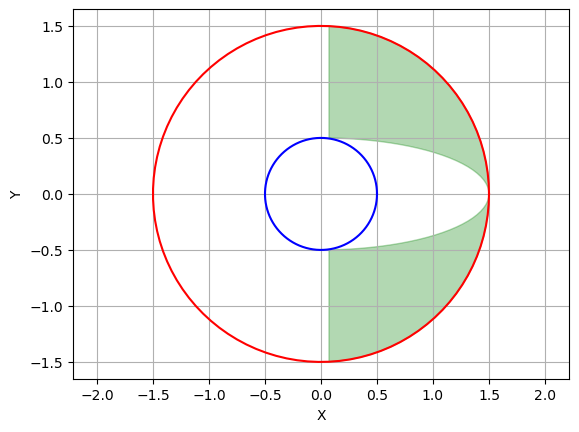

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los radios de las circunferencias
r1 = 0.5
r2 = 1.5

# Definir el rango de ángulos
t = np.linspace(0, 2*np.pi, 100)

# Calcular las coordenadas de las circunferencias
x1 = r1 * np.cos(t)
y1 = r1 * np.sin(t)
x2 = r2 * np.cos(t)
y2 = r2 * np.sin(t)

# Crear la figura
plt.figure()

# Dibujar las circunferencias
plt.plot(x1, y1, color='blue')
plt.plot(x2, y2, color='red')

# Rellenar el área entre las dos circunferencias
plt.fill_between(x2, y2, y1, where=(x2 > 0), color='green', alpha=0.3)

# Configurar los ejes
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')

# Mostrar el gráfico
plt.grid(True)
plt.show()

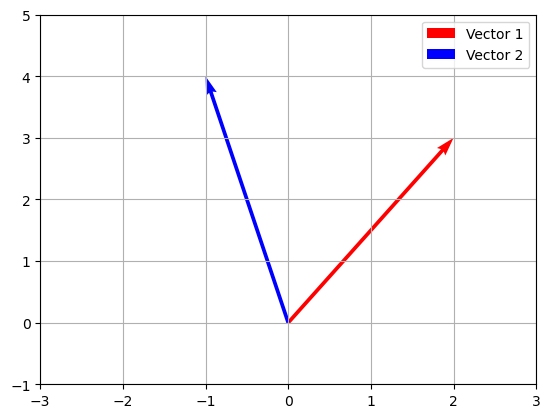

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define los vectores
vector1 = np.array([2, 3])
vector2 = np.array([-1, 4])

# Crea una figura y ejes
plt.figure()
ax = plt.gca()

# Dibuja los vectores
ax.quiver(0, 0, vector1[0], vector1[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector 1')
ax.quiver(0, 0, vector2[0], vector2[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector 2')

# Ajusta los límites del eje
ax.set_xlim([-3, 3])
ax.set_ylim([-1, 5])

# Añade una cuadrícula
plt.grid(True)

# Añade una leyenda
plt.legend()

# Muestra el gráfico
plt.show()

/tmp/ipykernel_787/3146614484.py:9: RuntimeWarning: overflow encountered in double_scalars
  dx = x**2+y#a*x-y-x*(x**2+y**2)
/tmp/ipykernel_787/3146614484.py:10: RuntimeWarning: invalid value encountered in double_scalars
  dy = x-y+a#x+a*y-y*(x**2+y**2)


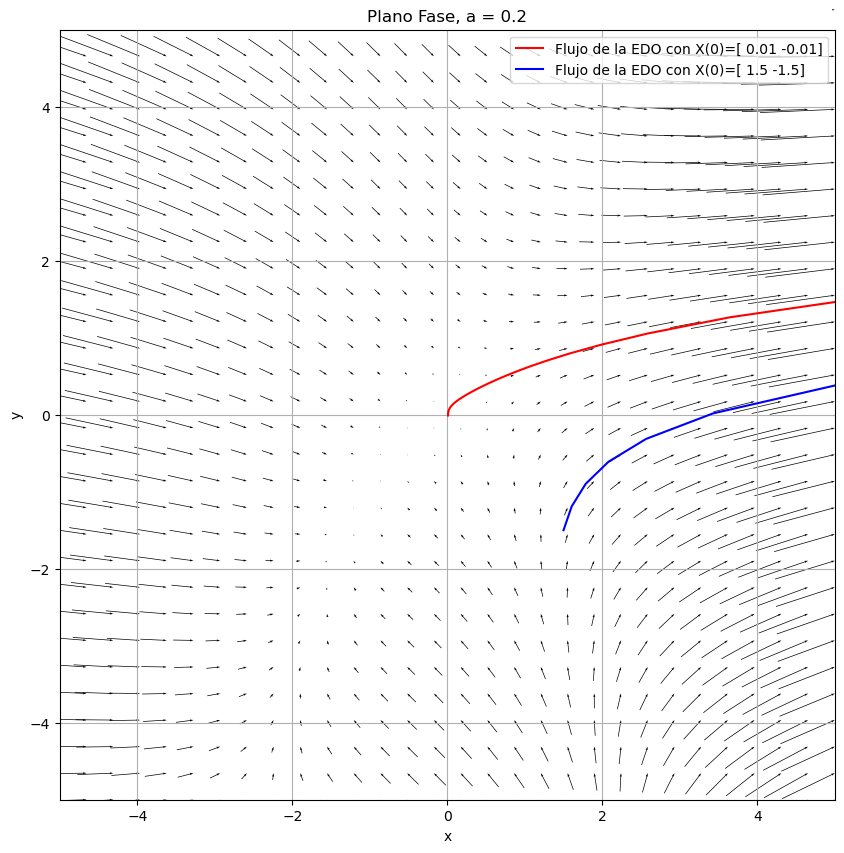

In [6]:
import numpy as np
import matplotlib.pyplot as plt

a=.2   # Parámetro
# Define el sistema de ecuaciones diferenciales
def f(z):
    x=z[0]
    y=z[1]
    dx = x**2+y#a*x-y-x*(x**2+y**2)
    dy = x-y+a#x+a*y-y*(x**2+y**2)
    return np.array([dx,dy])

#def polar(z):
 #   r=z[0]
  #  theta=z[1]
  #  dr = mu/8*r*(4-r**2)
  #  dtheta = 1
  #  return np.array([dr,dtheta])
# Crea una cuadrícula de valores x e y
L=5
x = np.linspace(-L, L, 30)
y = np.linspace(-L, L, 30)
X, Y = np.meshgrid(x, y)

# Calcula las derivadas en cada punto de la cuadrícula
d = f(np.array([X, Y]))
dX=d[0,:,:]
dY=d[1,:,:]

# Calcula la trayectoria a partir de un punto inicial con Runge-Kutta
def rk4(y0,h,n):
  y=np.zeros((2,n+1))
  y[:,0]=y0
  for k in range(n):
    k1=f(y[:,k])
    k2=f(y[:,k]+(h/2)*k1)
    k3=f(y[:,k]+(h/2)*k2)
    k4=f(y[:,k]+h*k3)
    y[:,k+1]=y[:,k]+(h/6)*(k1+2*k2+2*k3+k4)
  return y
#############################

#def rk4polar(y0,h,n):
 # y=np.zeros((2,n+1))
  #y[:,0]=y0
  #for k in range(n):
   # k1=polar(y[:,k])
    #k2=polar(y[:,k]+(h/2)*k1)
   # k3=polar(y[:,k]+(h/2)*k2)
   # k4=polar(y[:,k]+h*k3)
   # y[:,k+1]=y[:,k]+(h/6)*(k1+2*k2+2*k3+k4)
  #return y


##############################
#r1 = np.sqrt(1+mu)
#r2 = np.sqrt(1-mu)
#theta = np.linspace(0, 2*np.pi, 100)
#c1 = r1 * np.cos(theta)
#d1 = r1 * np.sin(theta)
#c2 = r2 * np.cos(theta)
#d2 = r2 * np.sin(theta)
##############################

##############################
y01=np.array([0.01,-0.01])
z1=rk4(y01,0.1,5000)
x1=z1[0,:]
y1=z1[1,:]

y02=np.array([1.5,-1.5])
z2=rk4(y02,0.1,5000)
x2=z2[0,:]
y2=z2[1,:]

############## POLAR ###################

#z01=np.array([1,-0.01])
#zz1=rk4polar(z01,0.1,5000)
#r1=zz1[0,:]
#theta1=zz1[1,:]

#z02=np.array([3,-3.5])
#zz2=rk4polar(z02,0.1,5000)
#r2=zz2[0,:]
#theta2=zz2[1,:]

##############################
fig, ax = plt.subplots(figsize = (10,10))
q = ax.quiver(X, Y, dX, dY, units='x', pivot='tip', width=0.009, scale=30)
ax.quiverkey(q, 0.9, 0.9, 1, label = 'Plano fase',labelpos='E',coordinates='figure')
ax.set_title(f'Plano Fase, a = {a}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-L, L)
ax.set_ylim(-L, L)
#ax.scatter(X, Y, color='0.5', s=1)
plt.plot(x1, y1, label=f'Flujo de la EDO con X(0)={y01}', color='red')
plt.plot(x2, y2, label=f'Flujo de la EDO con X(0)={y02}', color='blue')
#plt.plot(r1*np.cos(theta1),r1*np.sin(theta1) , label=f'Flujo de la Promediación con (r0, theta0)={z01}', color='green')
#plt.plot(r2*np.cos(theta2),r2*np.sin(theta2) , label=f'Flujo de la Promediación con (r0, theta0)={z02}', color='orange')

####
#plt.plot(c1, d1, color='green',label=f'Circunferencia con radio r_max = {r1}')
#plt.plot(c2, d2, color='green',label=f'Circunferencia con radio r_min = {r2}')
##3

plt.legend()
plt.grid(True)
plt.show()